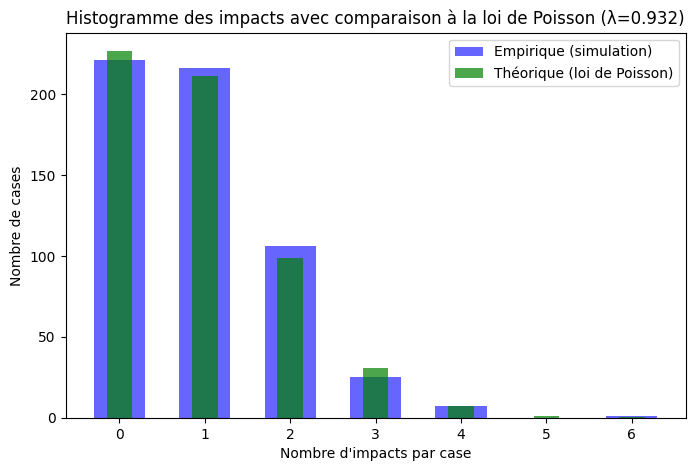

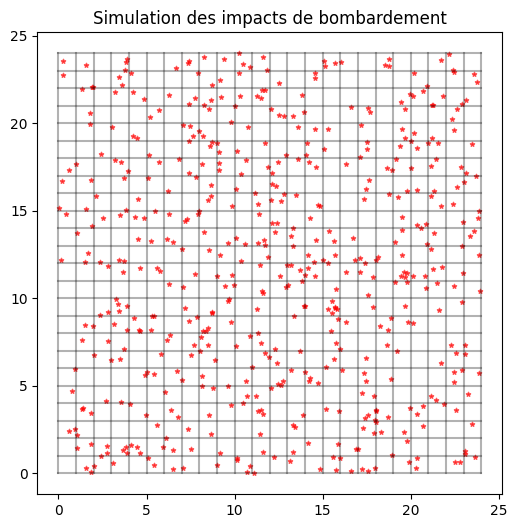

=== Analyse ===
Nombre total de cases : 576
Paramètre λ (moyenne par case) : 0.9323
Ecart-type théorique : 0.9656
Ecart-type empirique : 0.9431


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# ------------------------------
# Paramètres
# ------------------------------
ncases = 24               # nombre de cases par côté
nimpacts = 537            # nombre total d'impacts
N = ncases * ncases       # nombre total de cases
lam = nimpacts / N        # paramètre λ de la loi de Poisson

# ------------------------------
# a) Création de la zone
# ------------------------------

cx = np.arange(ncases + 1)
cy = np.arange(ncases + 1)
CX, CY = np.meshgrid(cx, cy)


# ------------------------------
# b) Bombardements
# ------------------------------
M = np.zeros((ncases, ncases), dtype=int)

# Générer les impacts
x_impacts, y_impacts = [], []
for _ in range(nimpacts):
    i = random.randint(0, ncases-1) + random.random()
    j = random.randint(0, ncases-1) + random.random()
    M[int(i),int(j)] += 1
    x_impacts.append(i)  # coordonnées pour affichage
    y_impacts.append(j)

# Nombre d'impacts par case (aplati en 1D)
M_flat = M.flatten()

# Histogramme empirique
valeurs, counts = np.unique(M_flat, return_counts=True)

plt.figure(figsize=(8,5))
plt.bar(valeurs, counts, width=0.6, color="blue", alpha=0.6, label="Empirique (simulation)")

# ------------------------------
# c) Loi de Poisson (sans scipy)
# ------------------------------
def poisson_pmf(k, lam):
    return math.exp(-lam) * (lam**k) / math.factorial(k)

k_vals = np.arange(0, max(valeurs)+1)
proba_theo = [poisson_pmf(k, lam) * N for k in k_vals]

plt.bar(k_vals, proba_theo, width=0.3, color="green", alpha=0.7, label="Théorique (loi de Poisson)")

plt.xlabel("Nombre d'impacts par case")
plt.ylabel("Nombre de cases")
plt.title(f"Histogramme des impacts avec comparaison à la loi de Poisson (λ={lam:.3f})")
plt.legend()
plt.show()

# Affichage de la carte des impacts
plt.figure(figsize=(6,6))
plt.plot(CX, CY, 'k', alpha=0.3)
plt.plot(CX.T, CY.T, 'k', alpha=0.3)
plt.scatter(x_impacts, y_impacts ,c="red", s=10, alpha=0.6, marker='*')
plt.title("Simulation des impacts de bombardement")
plt.show()

# ------------------------------
# d) Ecart-type
# ------------------------------
sigma_theo = math.sqrt(lam)
sigma_emp = np.std(M_flat)

print("=== Analyse ===")
print(f"Nombre total de cases : {N}")
print(f"Paramètre λ (moyenne par case) : {lam:.4f}")
print(f"Ecart-type théorique : {sigma_theo:.4f}")
print(f"Ecart-type empirique : {sigma_emp:.4f}")
